# Programming with Python

## Episode 5 - Making Choices

Teaching: 30 min, 
Exercises: 30 min 


## Objectives
- Write conditional statements including if, elif, and else branches.
- Correctly evaluate expressions containing and and or.

### How can my programs do different things based on data values?

In our last lesson, we discovered something suspicious was going on in our inflammation data by drawing some plots. 
How can we use Python to automatically recognise the different features we saw, and take a different action for each? 

In this lesson, we'll learn how to write code that runs only when certain conditions are true.

### Conditionals
We can ask Python to take different actions, depending on a condition, with an `if` statement:
```
num = 37
if num > 100:
    print('greater')
else:
    print('not greater')
print('done')
```

In [1]:
num = 37
if num > 100:
    print('greater')
else:
    print('not greater')
print('done')

not greater
done


The second line of this code uses the keyword `if` to tell Python that we want to make a choice. 

If the test (condition) that follows the `if` statement is *true*, the body of the `if` (i.e., the lines indented underneath it) are executed. If the test is *false*, the body of the `else` is executed instead. 

Only one or the other is ever executed.

### Executing a Conditional

`if` statements don't have to include an `else` if it is not required. If there isn't one, Python simply does nothing if the test is *false*:
```
num = 53
print('before conditional...')
if num > 100:
    print(num,' is greater than 100')
print('...after conditional')
```

In [2]:
num = 53
print('before conditional...')
if num > 100:
    print(num, ' is greater than 100')
print('...after conditional')

before conditional...
...after conditional


We can also chain several tests together using `elif`, which is short for "else if". 

The following Python code uses `elif` to print the sign (positive or negative) of a number.

```
num = -3

if num > 0:
    print(num, 'is positive')
elif num == 0:
    print(num, 'is zero')
else:
    print(num, 'is negative')
```
Note that to test for *equality* we use a double equals sign ``==`` rather than a single equals sign `=` which is used to assign values.

In [3]:
num = -3
if num > 0:
    print(num, 'is positive')
elif num == 0:
    print(num, 'is zero')
else:
    print(num, 'is negative')

-3 is negative


### `and`'s and `or`'s

We can also combine tests using `and` and `or`. 

`and` is only *true* if both parts are *true*:

```
if (1 > 0) and (-1 > 0):
    print('both parts are true')
else:
    print('at least one part is false')
```

In [4]:
if (1 > 0) and (-1 > 0):
    print('both parts are true')
else:
    print('at least one part is false')

at least one part is false


while `or` is true if at least one part is true:
```
if (1 < 0) or (-1 < 0):
    print('at least one test is true')
```

In [5]:
if (1 < 0) or (-1 < 0):
    print('at least one test is true')

at least one test is true


### `True` and `False`

`True` and `False` are special words (keywords) in Python called *booleans*, which represent truth values. A statement such as `1 < 0` returns the value `False`, while `-1 < 0` returns the value `True`.   The can be used in place of conditional expressions:
```
print(True of False
```

In [6]:
print((1 < 0) and (-1 < 0))

False


### Checking our Data
Now that we've seen how conditionals work, we can use them to check for the suspicious features we saw in our inflammation data.

Let's get back to where we left off in a previous episode:

```
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-03.csv', delimiter=',')
min_plot = matplotlib.pyplot.plot(numpy.max(data, axis=0))
matplotlib.pyplot.show()
```

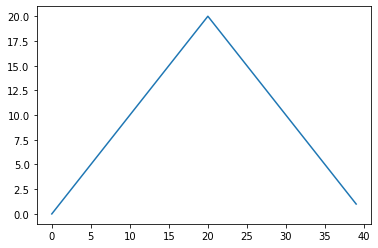

In [2]:
import numpy
import matplotlib.pyplot

data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
max_plot = matplotlib.pyplot.plot(numpy.max(data, axis=0))
matplotlib.pyplot.show()

From the  plots, we see that maximum daily inflammation exhibits a strange behaviour and raises one unit a day. Wouldn't it be a good idea to detect such behaviour and report it as suspicious? Let's do that! 

However, instead of checking every single day of the study, let's merely check if maximum inflammation in the beginning (day 0) and in the middle (day 20) of the study are equal to the corresponding day numbers.

First we'll get the max's for day 0 and day 20:
```
max_inflammation_0 = numpy.max(data, axis=0)[0]
max_inflammation_20 = numpy.max(data, axis=0)[20]
print(max_inflammation_0)
print(max_inflammation_20)
```

In [8]:
max_inflammation_0 = numpy.max(data, axis=0)[0]
max_inflammation_20 = numpy.max(data, axis=0)[20]
print(max_inflammation_0)
print(max_inflammation_20)

0.0
20.0


and then we'll check them for suspicious values:
```
if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print('Suspicious looking maxima!')
```

Note, we can add parentheses `( )` to improve clarity (and order of evaluation)

In [9]:
if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print('Suspicious looking maxima!')

Suspicious looking maxima!


We also saw a different problem in the third dataset; the minima per day were all zero (looks like a healthy person snuck into our study).
```
data = numpy.loadtxt(fname='data/inflammation-03.csv', delimiter=',')
min_plot = matplotlib.pyplot.plot(numpy.min(data, axis=0))
matplotlib.pyplot.show()
```

Let's have quick look at the all the `inflammation-03.csv` data set to confirm our suspicions
```
matplotlib.pyplot.imshow(data)
```
and look closely at the last row.

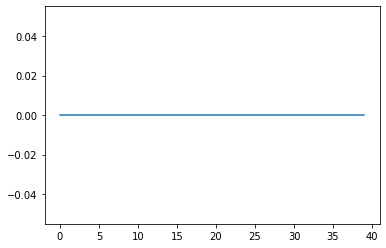

In [10]:
data = numpy.loadtxt(fname='data/inflammation-03.csv', delimiter=',')
min_plot = matplotlib.pyplot.plot(numpy.min(data, axis=0))
matplotlib.pyplot.show()

We can also get python to check for this condition by summing all the minima and testing the result:
```
if numpy.sum(numpy.min(data, axis=0)) == 0:
    print('Minima add up to zero!')
```

this will become an `elif` in our script.

In [14]:
if numpy.sum(numpy.min(data, axis=0)) == 0:
    print('Minima add up to zero!')

Minima add up to zero!


And if neither of these conditions are true, we can use an `else` statement to give the all-clear

So let's combine all these tests into a single script:
```
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

max_inflammation_0 = numpy.max(data, axis=0)[0]
max_inflammation_20 = numpy.max(data, axis=0)[20]

if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print('Suspicious looking maxima!')
elif numpy.sum(numpy.min(data, axis=0)) == 0:
    print('Minima add up to zero!')
else:
    print('Seems OK!')
```

give it a go with a selection of data files (eg, `inflammation-01.csv`, `inflammation-03.csv`)

In [3]:
data = numpy.loadtxt(fname='data/inflammation-01.csv', delimiter=',')

max_inflammation_0 = numpy.max(data, axis=0)[0]
max_inflammation_20 = numpy.max(data, axis=0)[20]

if max_inflammation_0 == 0 and max_inflammation_20 == 20:
    print('Suspicious looking maxima!')
elif numpy.sum(numpy.min(data, axis=0)) == 0:
    print('Minima add up to zero!')
else:
    print('Seems OK!')

Suspicious looking maxima!


### Minima add up to zero!
In this script, we have asked Python to do something different depending on the condition of our data. Here we printed messages in all cases, but we could also imagine not using the else catch-all so that messages are only printed when something is wrong, freeing us from having to manually examine every plot for features we've seen before.

## Exercises

#### How Many Paths?
Consider this code:
```
if 4 > 5:
    print('A')
elif 4 == 5:
    print('B')
elif 4 < 5:
    print('C')
```
Which of the following would be printed if you were to run this code? Why did you pick this answer?
```
A
B
C
B and C
```

Solution:

In [12]:
if 4 > 5:
    print('A')
elif 4 == 5:
    print('B')
elif 4 < 5:
    print('C')

C


### What Is Truth?

`True` and `False` booleans are not the only values in Python that are *true* and *false*. 

In fact, any value can be used in an `if` or `elif`. After reading and running the code below, explain what the rule is for which values are considered true and which are considered false.

```
if True:
    print('True is true - not very surprising')
if '':
    print('empty string is true')
if 'word':
    print('word is true')
if []:
    print('empty list is true')
if [1, 2, 3]:
    print('non-empty list is true')
if 0:
    print('zero is true')
if 1:
    print('one is true')
```

Solution:

In [1]:
if True:
    print('True is true - not very surprising')
if '':
    print('empty string is true')
if 'word':
    print('word is true')
if []:
    print('empty list is true')
if [1, 2, 3]:
    print('non-empty list is true')
if 0:
    print('zero is true')
if 1:
    print('one is true')

True is true - not very surprising
word is true
non-empty list is true
one is true


### That's Not Not What I Meant
Sometimes it is useful to check whether some condition is *not true*. The boolean operator `not` can do this explicitly. 

After reading and running the code below, write some `if` statements that use `not` to test the rule that you formulated in the previous challenge.
```
if not '':
    print('empty string is not true')
if not 'word':
    print('word is not true')
if not not True:
    print('not not True is true')
```

Solution:

In [2]:
if not '':
    print('empty string is not true')
if not 'word':
    print('word is not true')
if not not True:
    print('not not True is true')

empty string is not true
not not True is true


In [7]:
print(not not [])
print(not 0)
print(not 1)
print(not 2)

False
True
False
False


### Close Enough
Write some conditions that print True if the variable a is within 10% of the variable b and False otherwise. 
Compare your implementation with your partner's: do you get the same answer for all possible pairs of numbers?

In [2]:
a = 5
b = 4.5

if abs(a - b) <= (0.1 * abs(a) or 0.1 * abs(b)):
    print(True)
else:
    print(False)

True


### In-Place Operators
Python (and most other languages in the C family) provides in-place operators that work like this:
```
x = 1  # original value
x += 1 # add one to x, assigning result back to x
x *= 3 # multiply x by 3
print(x)
```

Write some code that sums the positive and negative numbers in a list separately, using in-place operators. Do you think the result is more or less readable than writing the same without in-place operators?

In [3]:
x = 1
x = x + 1
x = x * 3
print(x)

6


In [4]:
positive_sum = 0
negative_sum = 0
numbers = [1,-2,3,4,-5,0, 6]
for i in numbers:
    if i > 0:
        positive_sum += i
#         positive_sum = positive_sum + i
    elif i < 0:
        negative_sum += i
    
    
print('Sum of Positive numbers:', positive_sum)
print('Sum of Negative numbers:', negative_sum)

Sum of Positive numbers: 14
Sum of Negative numbers: -7


### Sorting a List Into Buckets

In our data folder, large data sets are stored in files whose names start with "inflammation-" and small data sets – in files whose names start with "small-". We also have some other files that we do not care about at this point. We'd like to break all these files into three lists called `large_files`, `small_files`, and `other_files`, respectively.

Add code to the template below to do this. Note that the string method `startswith` returns `True` if and only if the string it is called on starts with the string passed as an argument, e.g.:
```
print("String".startswith("Str"))
print("String".startswith("somethingelse"))
```

note that `startswith` is case sensitive.

In [8]:
print("String".startswith("Str"))
print("String".startswith("somethingelse"))
print("something".startswith("somethingelse"))
print("somethingelse".startswith("something"))

True
False
False
True


Use the following Python code as your starting point:

In [1]:
files = ['inflammation-01.csv',
         'myscript.py',
         'inflammation-02.csv',
         'small-01.csv',
         'small-02.csv']
large_files = []
small_files = []
other_files = []

# list_name.append(filename)

for file in files:
    if file.startswith("inflammation-"):
        large_files.append(file)
    elif file.startswith("small-"):
        small_files.append(file)
    else:
        other_files.append(file)

print('large_files:', large_files)
print('small_files:', small_files)
print('other_files:', other_files)

large_files: ['inflammation-01.csv', 'inflammation-02.csv']
small_files: ['small-01.csv', 'small-02.csv']
other_files: ['myscript.py']


Your solution should:

- loop over the names of the files
- figure out which group each filename belongs
- append the filename to that list
- In the end the three lists should be:
```
large_files = ['inflammation-01.csv', 'inflammation-02.csv']
small_files = ['small-01.csv', 'small-02.csv']
other_files = ['myscript.py']
```

### Counting Vowels
Write a loop that counts the number of vowels in a character string.

Test it on a few individual words and full sentences.

Once you are done, compare your solution to your neighbour's. Did you make the same decisions about how to handle the letter 'y' (which some people think is a vowel, and some do not)?

In [2]:
string = 'blah'
count = 0

for char in string:
    count = count + 1
    print(count)
print(count)

1
2
3
4
4


In [3]:
vowels = 'aeiouAEIOU'
sentence = "Python Is Fun!"
count = 0

for char in sentence:
    if char in vowels:
        count = count + 1
    
print('The number of vowels in this string is:', count)

The number of vowels in this string is: 3


## Key Points

- Use the `if` keyword to start a conditional statement, the `elif` keyword to provide additional tests, and the `else` keyword to provide a default.

- The bodies of the branches of conditional statements must be indented.

- Use `==` to test for equality.

- X `and` Y is only true if both X and Y are true.

- X `or` Y is true if either X or Y, or both, are true.

- Zero `0`, the empty string `""`, and the empty list `[]` are considered false; all other numbers, strings, and lists are considered true.

- `True` and `False` represent truth values.

### Save, and version control your changes

- save your work: `File -> Save`
- add all your changes to your local repository: `Terminal -> git add .`
- commit your updates a new Git version:  `Terminal -> git commit -m "End of Episode 5"`
- push your latest commits to GitHub: `Terminal -> git push`